In [66]:
import pandas as pd

In [67]:
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("../data/processed/online_retail_cleaned.csv")
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


Monthly Revenue Trend:

In [69]:
monthly_revenue = (
    df.groupby(["year", "month"])['total_price']
    .sum()
    .reset_index()
    .sort_values(["year", "month"])
    )
monthly_revenue.head()

,year,month,total_price
0,2010,12,572713.890
1,2011,1,569445.040
2,2011,2,447137.350
3,2011,3,595500.760
4,2011,4,469200.361


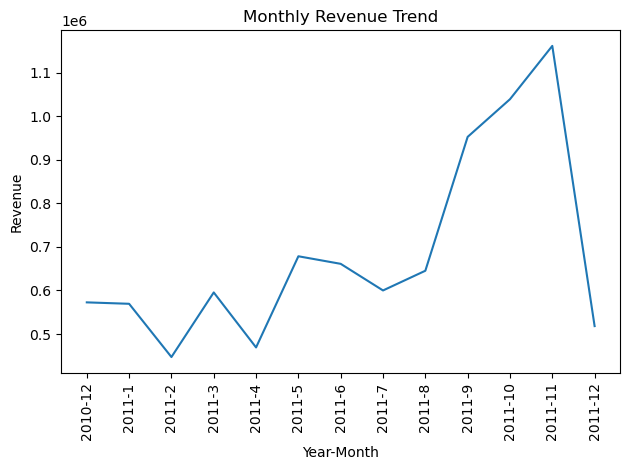

In [70]:
os.makedirs("../outputs/figures/", exist_ok = True)
plt.figure()
plt.plot(monthly_revenue["year"].astype(str) + "-" + monthly_revenue["month"].astype(str), monthly_revenue["total_price"])
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.savefig("../outputs/figures/monthly_revenue.png")
plt.show()

Top 10 Countries by Revenue:

In [71]:
top_countries = (
    df.groupby("country")["total_price"]
    .sum()
    .sort_values(ascending = False)
    .head(10)
)
top_countries

country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: total_price, dtype: float64

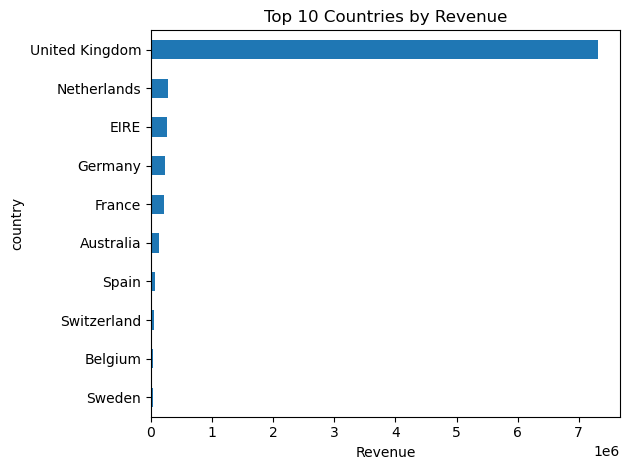

In [72]:
plt.figure()
top_countries.sort_values().plot(kind="barh")
plt.xlabel("Revenue")
plt.title("Top 10 Countries by Revenue")
plt.tight_layout()
plt.savefig("../outputs/figures/top_countries_revenue.png")
plt.show()

Revenue Per Invoice:

In [73]:
invoice_totals = df.groupby("invoice_no")["total_price"].sum()
aov = invoice_totals.mean()
round(aov,2)

np.float64(480.87)

Top 5 Countries by Revenue:

In [74]:
top5_country_names = top_countries.index[:5]
aov_by_country = (
    df[df["country"].isin(top5_country_names)]
    .groupby(["country", "invoice_no"])["total_price"].sum()
    .groupby("country").mean()
    .sort_values(ascending = False)
)
aov_by_country

country
Netherlands       3036.663191
EIRE              1021.330385
France             537.336889
Germany            500.803370
United Kingdom     439.047913
Name: total_price, dtype: float64

Top 10 Customers by Lifetime Value:

In [75]:
top_customers = (
    df.groupby("customer_id")["total_price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

customer_id
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: total_price, dtype: float64

In [76]:
top_products = (
    df.groupby("description")["total_price"]
    .sum()
    .sort_values(ascending = False)
    .head(10)
)
top_products

description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: total_price, dtype: float64

In [77]:
top_countries.to_csv("../outputs/top_countries.csv")
top_customers.to_csv("../outputs/top_customers.csv")

## Key Insights

- Monthly revenue shows clear seasonality, with stronger performance toward year-end.
- The United Kingdom dominates total revenue, contributing the majority of sales.
- The average order value (AOV) is approximately 480.87, indicating high-value transactions per order.
- Some international markets, such as the Netherlands and EIRE, have much higher AOV despite lower total revenue.
- Revenue is highly concentrated among a small number of customers and products.
